# Proyecto de Datos: Denuncias en Defensa del Consumidor
## Autor: Rodolfo Pardo
### Fuente de datos: Datos.gob.ar
#### Invitado: Mario Vadillo, Diputado provincial de Protectora Fuerza Política

Hipótesis planteadas por Mario Vadillo y a estudiarse en el estudio de datos: 

1. El rubro de la telefonía y/o telecomunicaciones es el más denunciado.
2. Movistar es la primer razón social denunciada. 
3. CABA es la localización con mayor cantidad de denuncias realizadas.

In [1]:
#Importando librerias 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
reclamos = pd.read_csv('/Users/rodolfopardo/Downloads/reclamos-ingresados.csv', sep = ";")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Primeros cinco valores del dataset

reclamos.head()

,fecha,id_reclamo,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,motivo_rechazo,region_reclamante,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante
0,1/3/2018,143587,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,-,-,NaN,Noroeste,38,Jujuy,-,NaN
1,1/3/2018,143588,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,-,NaN,Noroeste,38,Jujuy,-,NaN
2,1/3/2018,143589,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,-,NaN,Noroeste,38,Jujuy,-,NaN
3,1/3/2018,143590,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",-,-,NaN,Noroeste,38,Jujuy,-,NaN
4,1/3/2018,143591,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,-,-,NaN,Noroeste,38,Jujuy,-,NaN


In [4]:
#Ultimos 

reclamos.tail()

,fecha,id_reclamo,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,motivo_rechazo,region_reclamante,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante
182671,1/6/2019,326258,Imp Assist SA,Consumo Protegido,Consumo Protegido,Servicios,Servicios financieros y seguros,Tarjetas de crédito,A distancia,Cumplimiento parcial o defectuoso de la presta...,"Débito o imposición de seguros no solicitados,...",Desestimado,Rechazo - Jurisdiccion,Pampeana,6,Buenos Aires,Masculino,37
182672,1/6/2019,326259,International Home SA,Consumo Protegido,Consumo Protegido,Productos,Muebles,Muebles de living,Presencial,Garantía de bienes - Art 11 Ley 24.240,Falta de cumplimento garantía posventa,-,NaN,Pampeana,2,Ciudad Autónoma de Buenos Aires,Masculino,50
182673,1/6/2019,326260,Mercadolibre SRL,Consumo Protegido,Consumo Protegido,Servicios,Servicios financieros y seguros,Tarjetas de débito,A distancia,Problemas de fraude o estafa,-,-,NaN,Pampeana,2,Ciudad Autónoma de Buenos Aires,Masculino,33
182674,1/6/2019,326261,Tarjeta Naranja SA,Consumo Protegido,Consumo Protegido,Servicios,Servicios financieros y seguros,Tarjetas de crédito,A distancia,Incumplimiento total de la prestación del serv...,-,-,NaN,Pampeana,2,Ciudad Autónoma de Buenos Aires,Femenino,31
182675,1/6/2019,326262,Latam Airlines Group SA,Consumo Protegido,Consumo Protegido,Servicios,Servicios de transporte aéreo,Transporte aéreo de pasajeros,A distancia,Cancelación o supresión de vuelos,-,-,NaN,Pampeana,2,Ciudad Autónoma de Buenos Aires,Masculino,33


In [5]:
#Columnas

reclamos.columns

Index(['fecha', 'id_reclamo', 'razon_social', 'ingreso_por', 'derivado_a',
       'categoria', 'rubro', 'subrubro', 'modalidad', 'motivo',
       'especificacion_motivo', 'estado', 'motivo_rechazo',
       'region_reclamante', 'id_provincia', 'provincia_reclamante',
       'genero_reclamante', 'edad_reclamante'],
      dtype='object')

In [6]:
#Tipos de datos en cada columna

reclamos.dtypes

fecha                    object
id_reclamo                int64
razon_social             object
ingreso_por              object
derivado_a               object
categoria                object
rubro                    object
subrubro                 object
modalidad                object
motivo                   object
especificacion_motivo    object
estado                   object
motivo_rechazo           object
region_reclamante        object
id_provincia              int64
provincia_reclamante     object
genero_reclamante        object
edad_reclamante          object
dtype: object

In [7]:
#Cantidad de reclamos 

reclamos.shape[0]

182676

In [8]:
#Cantidad de valores nulos

reclamos.isnull().sum()

fecha                         0
id_reclamo                    0
razon_social                  0
ingreso_por                   0
derivado_a                    0
categoria                     0
rubro                         0
subrubro                      0
modalidad                     0
motivo                        0
especificacion_motivo         0
estado                        0
motivo_rechazo           173815
region_reclamante             0
id_provincia                  0
provincia_reclamante          0
genero_reclamante             0
edad_reclamante           25397
dtype: int64

In [9]:
#Limpiando valores nulos relacionados a edad

reclamos['edad_reclamante'] = reclamos['edad_reclamante'].fillna('')

In [10]:
#Limpiando valores nulos relacionados a motivos 

reclamos['motivo_rechazo'] = reclamos['motivo_rechazo'].fillna('sin motivo')

In [11]:
#Limpiando valores de string que no se pueden convertir a valores numericos

reclamos['edad_reclamante'] = reclamos['edad_reclamante'].str.replace('-','')


In [12]:
#Convirtiendo la columna edad_reclamante en numeric. Estaba en formato objeto 

reclamos['edad_reclamante'] = pd.to_numeric(reclamos['edad_reclamante'])


In [13]:
#Convirtiendo la columna fecha en datetime. Estaba en objeto

reclamos['fecha'] = pd.to_datetime(reclamos['fecha'])

#### <font color=red> Ya tenemos nuestra base sin valores nulos y con los tipos de variables correctas

In [14]:
#Comprobamos los tipos 

reclamos.dtypes

fecha                    datetime64[ns]
id_reclamo                        int64
razon_social                     object
ingreso_por                      object
derivado_a                       object
categoria                        object
rubro                            object
subrubro                         object
modalidad                        object
motivo                           object
especificacion_motivo            object
estado                           object
motivo_rechazo                   object
region_reclamante                object
id_provincia                      int64
provincia_reclamante             object
genero_reclamante                object
edad_reclamante                 float64
dtype: object

In [15]:
#Comprobamos que ya no existan valores nulos  

reclamos.isnull().sum()

fecha                         0
id_reclamo                    0
razon_social                  0
ingreso_por                   0
derivado_a                    0
categoria                     0
rubro                         0
subrubro                      0
modalidad                     0
motivo                        0
especificacion_motivo         0
estado                        0
motivo_rechazo                0
region_reclamante             0
id_provincia                  0
provincia_reclamante          0
genero_reclamante             0
edad_reclamante          131619
dtype: int64

## Visualizaciones y primeros datos 

### Regiones y provincias con más y menos reclamos de Argentina

##### <font color=green> Las 10 provincias con más reclamos 

In [19]:
reclamos.groupby('provincia_reclamante')['id_reclamo'].count().sort_values(ascending = False).head(10)

provincia_reclamante
Buenos Aires                       82254
Ciudad Autónoma de Buenos Aires    65835
Córdoba                             7296
Santa Fe                            4485
Mendoza                             3150
Entre Ríos                          2474
Río Negro                           1922
Neuquén                             1873
Catamarca                           1576
Tucumán                             1505
Name: id_reclamo, dtype: int64

### <font color=red> Se rechaza en parte la hipótesis de Mario Vadillo, Diputado provincial, en que demuestra que la mayor cantidad de denuncias se da CABA, ya que la provincia de Buenos Aires lidera el ranking, seguido de CABA.
    
   
<font color=red> La provincia de Mendoza ocupa el quinto lugar con 3150 denuncias realizadas durante 2018-2019

##### <font color=green> Las 10 provincias con menos reclamos

In [20]:
reclamos.groupby('provincia_reclamante')['id_reclamo'].count().sort_values(ascending = False).tail(10)

provincia_reclamante
Salta                                                    915
La Rioja                                                 873
Jujuy                                                    782
Santa Cruz                                               726
San Luis                                                 723
Santiago del Estero                                      616
San Juan                                                 583
Tierra del Fuego, Antártida e Islas del Atlántico Sur    358
La Pampa                                                 356
Formosa                                                  254
Name: id_reclamo, dtype: int64

<font color=blue> Formosa, La Pampa y Tierra del Fuego son las que tienen menor cantidad de denuncias

##### <font color=green> La región del país con mayor cantidad de denuncias

In [22]:
reclamos.groupby('region_reclamante')['id_reclamo'].count().sort_values(ascending = False)

region_reclamante
Pampeana     160226
Patagonia      5943
Noreste        5681
Noroeste       5497
Cuyo           5329
Name: id_reclamo, dtype: int64

<font color = blue> La región Pampeana lidera el ranking de denuncias.
<font color = red> La región de Cuyo es la que menos denuncias tiene.

##### <font color= green> Los rubros más denunciados en Defensa del Consumidor

In [24]:
reclamos.groupby('rubro')['id_reclamo'].count().sort_values(ascending = False).head(20)

rubro
Servicios de comunicaciones                                        44823
Servicios financieros y seguros                                    33553
Rodados, automotores y embarcaciones                               14299
Electrodomésticos y artefactos para el hogar                       12027
Servicios de transporte aéreo                                       8073
Servicios públicos domiciliarios                                    8050
Textil, calzado y marroquinería                                     7805
Servicios y eventos de esparcimiento, culturales y/o deportivos     7765
Equipos de telefonía                                                5743
Servicios de transporte terrestre de pasajeros y cargas             4064
Servicios de salud                                                  3788
Servicios turísticos                                                3366
Alimentos y bebidas                                                 3219
Servicio de administración de pagos          

<font color=blue> El rubro de las telecomunicaciones y servicios financieros son los más denunciados.

### <font color=green> Esto confirma la hipótesis de Mario Vadillo que afirma que el rubro más denunciado es el de la telefonía

##### <font color=green> Conozcamos los subgrupos de denuncias

In [27]:
reclamos.groupby('subrubro')['id_reclamo'].count().sort_values(ascending = False).head(20)

subrubro
Tarjetas de crédito                                                       15907
Televisión por cable/satelital                                            13675
Automóviles                                                               13284
Internet                                                                   8837
Transporte aéreo de pasajeros                                              8034
Telefonía celular                                                          7647
Telefonía fija                                                             6947
Paquetes de productos (Tv Satelital + Internet + Telefonía fija, etc.)     6914
Luz                                                                        6021
Teléfonos celulares                                                        5451
Espectáculos (deportivos, recitales, teatro, etc.)                         5230
Calzado                                                                    3830
TV Led y artículos de video    

#### Las tarjetas de crédito llevan la delantera y lo siguen muy de cerca los servicios de televisión por cable y automóviles. Internet y transporte aéreo de pasajeros se ubican también entre los primeros lugares

In [28]:
reclamos.groupby('subrubro')['id_reclamo'].count().sort_values(ascending = False).tail(5)

subrubro
Articulos de decoracion para fiestas (globos, guirnaldas, etc)    1
Encendedores y Fosforos                                           1
Colchones eléctricos                                              1
Handies                                                           1
Duplicación de llaves                                             1
Name: id_reclamo, dtype: int64

#### Los menos denunciados son artículos de decoración para fiestas, encendedores, colchones eléctricos, handies y duplicación de llaves

#### Edades de los denunciantes 

In [30]:
reclamos.groupby('edad_reclamante')['id_reclamo'].count().sort_values(ascending = False).head(10)

edad_reclamante
33.0    1966
32.0    1961
31.0    1957
34.0    1953
30.0    1916
37.0    1886
29.0    1819
35.0    1816
28.0    1725
36.0    1665
Name: id_reclamo, dtype: int64

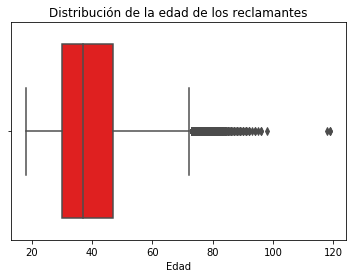

In [39]:
sns.boxplot(reclamos['edad_reclamante'], color = "red")
plt.xlabel("Edad")
plt.title("Distribución de la edad de los reclamantes")
plt.show()

1. La gran mayoría de los denunciantes se ubica entre los 27 a 45 años 
2. Tenemos presentes unos outliers que superan los 85 años de edad, el promedio de vida. 

In [40]:
#Estadistica descriptiva 

print("La media en cuanto a las edades es de:", np.mean(reclamos['edad_reclamante']))
print("La desviación standart en cuanto a las edades es de:", np.std(reclamos['edad_reclamante']))

La media en cuanto a las edades es de: 39.635740446951445
La desviación standart en cuanto a las edades es de: 12.50653001446049


In [43]:
#Outliers 
#Vamos a observar las personas que han realizado denuncias a partir de los 85 años 


reclamos_85 = reclamos[reclamos['edad_reclamante'] > 85]
reclamos_85.shape

(62, 18)

Tenemos 62 reclamos realizados por personas mayores a 85 años

### <font color=green>Se confirma la hipótesis de Mario Vadillo: las denuncias se realizan entre los 25 a 45 años, siendo 33 años la edad en la que las personas realizan la mayor cantidad de denuncias

#### Analizamos la cantidad de denuncias online y presenciales 

In [46]:
reclamos.groupby('modalidad')['id_reclamo'].count().sort_values(ascending = False)

modalidad
A distancia       126799
Presencial         55142
Sin clasificar       735
Name: id_reclamo, dtype: int64

Los reclamos online y realizados a distancia son los más frecuentes

#### Empresas más denunciadas en Defensa del Consumidor

In [47]:
reclamos.groupby('razon_social')['id_reclamo'].count().sort_values(ascending = False).head(15)

razon_social
Telecentro SA                      10964
Telecom Argentina SA                4801
Telefonica de Argentina SA          4620
Banco Santander Rio SA              4147
Telefonica moviles argentina SA     4025
Mercadolibre SRL                    3734
Telecom Personal SA                 3680
Cablevision SA                      3677
Fibertel                            3265
Empresa Distribuidora Sur SA        3178
Directv Argentina SA                2970
Falabella SA                        2870
Dg Medios y Espectaculos SA         2630
Fravega SACIEI                      2485
Latam Airlines Group SA             2473
Name: id_reclamo, dtype: int64

#### Telecentro encabeza la lista, seguido de Telecom y Telefónica de Argentina. 
#### Banco Santander Río, Mercado Libre y Cablevisión le siguen.

### Denuncias por fecha

<Figure size 1224x1224 with 0 Axes>

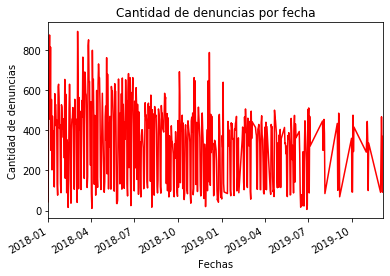

<Figure size 1224x1224 with 0 Axes>

In [68]:
count_fechas = reclamos['fecha'].value_counts()

count_fechas.plot(color = "red")
plt.xlabel("Fechas")
plt.ylabel("Cantidad de denuncias")
plt.title("Cantidad de denuncias por fecha")
plt.figure(figsize=(17,17))


#### La realización de denuncias han disminuído en comparación a 2018